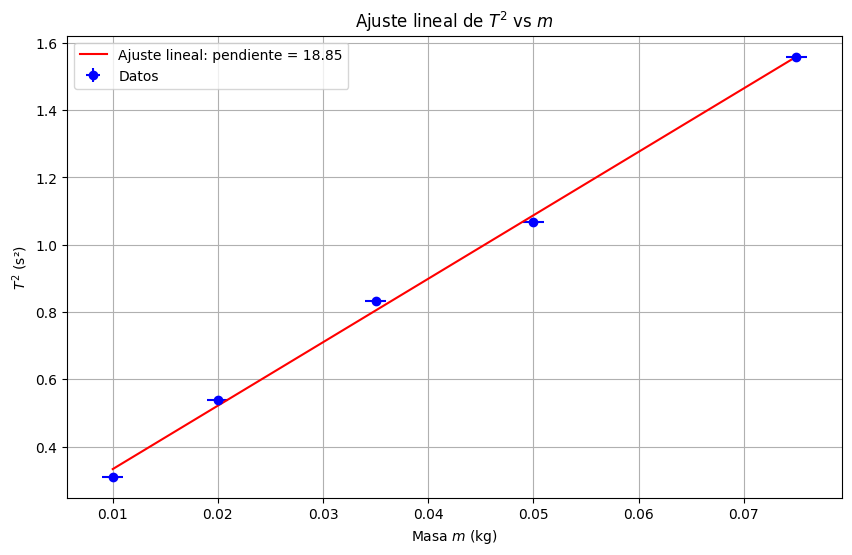

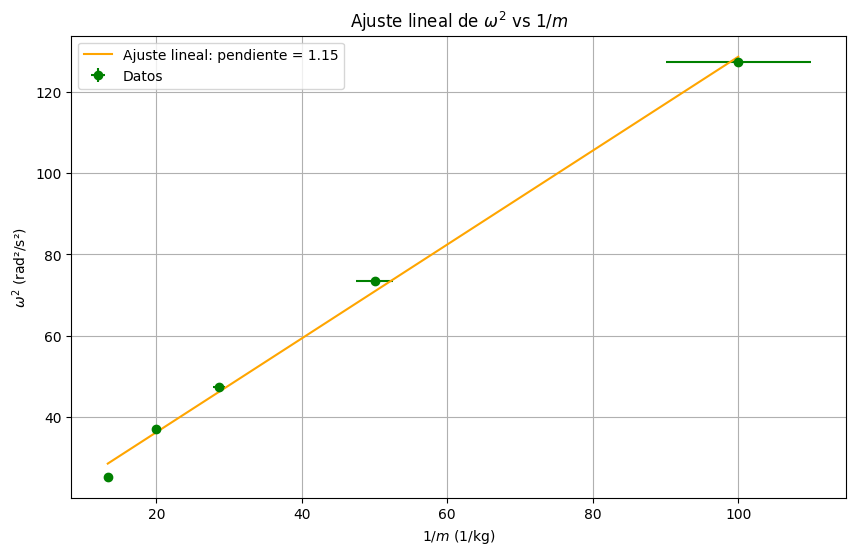

Valor de k usando T^2 vs m: k = 2.09 ± 0.00 N/m
Valor de k usando ω^2 vs 1/m: k = 1.15 ± 0.00 N/m


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
mass = np.array([10, 20, 35, 50, 75]) * 1e-3  # masa en kg
periodos = np.array([0.557, 0.733, 0.912, 1.033, 1.248])  # periodos en segundos

# Errores
error_periodo = 0.00002  # error en el periodo (s)
error_masa = 0.001  # error en la masa (kg)

# Calcular T^2 y ω^2
periodos_squared = periodos**2  # T^2
omega_squared = (2 * np.pi / periodos)**2  # ω^2
mass_inversed = 1 / mass  # 1/m

# Calcular los errores en T^2 y ω^2
error_T2 = 2 * periodos * error_periodo  # Error en T^2
error_omega2 = (4 * np.pi**2 / periodos**3) * error_periodo  # Error en ω^2

# Ajuste lineal T^2 vs m (sin 'full=True')
pendiente_T2_m, intercepto_T2_m = np.polyfit(mass, periodos_squared, 1)  # Ajuste sin full=True
k_T2_vs_m = 4 * np.pi**2 / pendiente_T2_m  # Calcular k
ajuste_T2_m = np.polyval([pendiente_T2_m, intercepto_T2_m], mass)

# Ajuste lineal ω^2 vs 1/m (sin 'full=True')
pendiente_omega2_1_m, intercepto_omega2_1_m = np.polyfit(mass_inversed, omega_squared, 1)  # Ajuste sin full=True
k_omega2_vs_1_m = pendiente_omega2_1_m  # La pendiente es directamente k
ajuste_omega2_1_m = np.polyval([pendiente_omega2_1_m, intercepto_omega2_1_m], mass_inversed)

# Graficar T^2 vs m con barras de error
plt.figure(figsize=(10, 6))
plt.errorbar(mass, periodos_squared, xerr=error_masa, yerr=error_T2, fmt='o', color='blue', label="Datos")
plt.plot(mass, ajuste_T2_m, color='red', label=f"Ajuste lineal: pendiente = {pendiente_T2_m:.2f}")
plt.title("Ajuste lineal de $T^2$ vs $m$")
plt.xlabel("Masa $m$ (kg)")
plt.ylabel("$T^2$ (s²)")
plt.legend()
plt.grid(True)
plt.show()

# Graficar ω^2 vs 1/m con barras de error
plt.figure(figsize=(10, 6))
plt.errorbar(mass_inversed, omega_squared, xerr=error_masa / mass**2, yerr=error_omega2, fmt='o', color='green', label="Datos")
plt.plot(mass_inversed, ajuste_omega2_1_m, color='orange', label=f"Ajuste lineal: pendiente = {pendiente_omega2_1_m:.2f}")
plt.title("Ajuste lineal de $\omega^2$ vs $1/m$")
plt.xlabel("$1/m$ (1/kg)")
plt.ylabel("$\omega^2$ (rad²/s²)")
plt.legend()
plt.grid(True)
plt.show()

# Calcular k y errores
error_k_T2_vs_m = np.abs(k_T2_vs_m * (error_periodo / pendiente_T2_m))  # Error en k usando T^2 vs m
error_k_omega2_vs_1_m = np.abs(k_omega2_vs_1_m * (error_periodo / pendiente_omega2_1_m))  # Error en k usando ω^2 vs 1/m

# Resultados
print(f"Valor de k usando T^2 vs m: k = {k_T2_vs_m:.2f} ± {error_k_T2_vs_m:.2f} N/m")
print(f"Valor de k usando ω^2 vs 1/m: k = {k_omega2_vs_1_m:.2f} ± {error_k_omega2_vs_1_m:.2f} N/m")


In [23]:
from math import pi
val = 4 * pi**2/19**2*0.1
val

0.010935849751899566